In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [4]:
import matplotlib.pyplot as plt

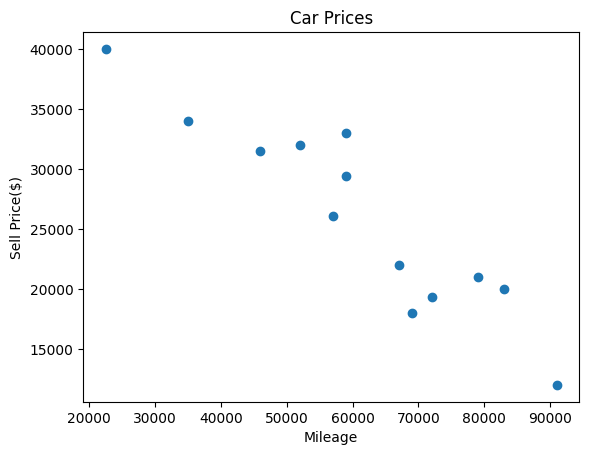

In [27]:
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.title('Car Prices')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.show()

In [7]:
from sklearn import linear_model

In [9]:
rg = linear_model.LinearRegression()
rg.fit(df[['Mileage']], df['Sell Price($)'])

LinearRegression()

In [10]:
rg.coef_

array([-0.38676378])

In [11]:
rg.intercept_

49571.041151475045

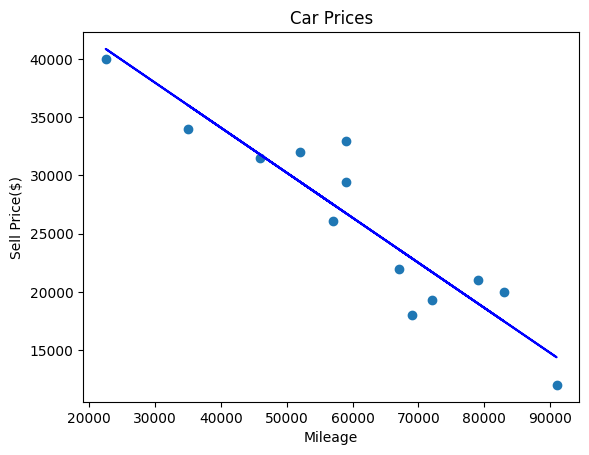

In [23]:
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.plot(df['Mileage'], rg.predict(df[['Mileage']]), color='blue')
plt.title('Car Prices')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.show()

In [13]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [14]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [15]:
final = merged.drop(["Car Model","Mercedez Benz C class"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [16]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [17]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [18]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
model.score(X,y)

0.9417050937281083

In [20]:
model.predict([[45000,4,0,0]])

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [21]:
model.predict([[86000,7,0,1]])

/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [38]:
y_pred = model.predict(X)
y_pred

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

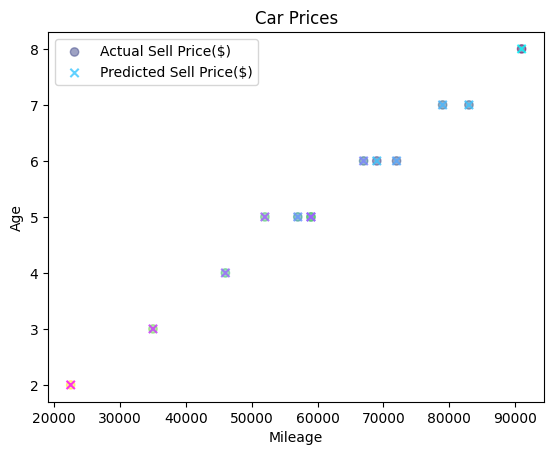

In [53]:
# Plot scatter plot with predictions and regression line
fig, ax = plt.subplots()
scatter = ax.scatter(X['Mileage'], X['Age(yrs)'], c=y, cmap='viridis', alpha=0.5)
ax.scatter(X['Mileage'], X['Age(yrs)'], c=y_pred, marker='x', cmap='cool', alpha=0.8)
ax.set_title('Car Prices')
ax.set_xlabel('Mileage')
ax.set_ylabel('Age')
ax.legend(*scatter.legend_elements(), title='Sell Price($)')
ax.legend(['Actual Sell Price($)', 'Predicted Sell Price($)', 'Regression Line'])
plt.show()